`Exploratory Data Analysis (EDA) on Retail Sales Data`

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data Loading 
df = pd.read_csv(r'retail_sales_dataset.csv')

In [3]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


`Data Cleaning`

In [4]:
# To get the row index
df.index

RangeIndex(start=0, stop=1000, step=1)

In [5]:
# To get the column index
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [6]:
# Shape of the dataset
df.shape

(1000, 9)

In [7]:
# To get the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [11]:
# Checking the null values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

- If null values exists `below or 50%` of the dataset, then `drop null values` using `df.dropna(inplace=True)`

- If null values exists `above 50%` of the dataset, then `fill null values` using `mean or median or mode` 

In [8]:
# Checking the duplicate values
df.duplicated().sum()

0

- If duplicated exists , then drop duplicated using `df.drop_duplicates(inplace=True)`

In [9]:
# Statistical Analysis
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [10]:
# Statistical Analysis --> for object datas
df.describe(include = 'O')

,Date,Customer ID,Gender,Product Category
count,1000,1000,1000,1000
unique,345,1000,2,3
top,2023-05-16,CUST001,Female,Clothing
freq,11,1,510,351


`Data Manipulation`

Convert categorical into numerical --> Encoding

In [11]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [12]:
# Checking the unique cateogory 
df['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [13]:
df['Product Category'] = df['Product Category'].map({'Beauty' : 0, 'Clothing' : 1, 'Electronics' : 2})

In [14]:
# Checking the encoding works 
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,0,34,0,3,50,150
1,2,2023-02-27,CUST002,1,26,1,2,500,1000
2,3,2023-01-13,CUST003,0,50,2,1,30,30
3,4,2023-05-21,CUST004,0,37,1,1,500,500
4,5,2023-05-06,CUST005,0,30,0,2,50,100


In [15]:
# checking the datatypes
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender               int64
Age                  int64
Product Category     int64
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

`Exploratory Data Analysis - EDA process`

In [16]:
# Descriptive Statistics 
df.describe()

,Transaction ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.51000,41.39200,1.035000,2.514000,179.890000,456.000000
std,288.819436,0.50015,13.68143,0.805247,1.132734,189.681356,559.997632
min,1.000000,0.00000,18.00000,0.000000,1.000000,25.000000,25.000000
25%,250.750000,0.00000,29.00000,0.000000,1.000000,30.000000,60.000000
50%,500.500000,1.00000,42.00000,1.000000,3.000000,50.000000,135.000000
75%,750.250000,1.00000,53.00000,2.000000,4.000000,300.000000,900.000000
max,1000.000000,1.00000,64.00000,2.000000,4.000000,500.000000,2000.000000


In [17]:
# Another method for Descriptive Statistics 

# For Total Amount
print("Mean of Total Profit : ", df['Total Amount'].mean())
print("Median of Total Profit : ", df['Total Amount'].median())
print("Mode of Total Profit : ", df['Total Amount'].mode())
print("Standard deviation of Total Profit : ", df['Total Amount'].std())

Mean of Total Profit :  456.0
Median of Total Profit :  135.0
Mode of Total Profit :  0    50
Name: Total Amount, dtype: int64
Standard deviation of Total Profit :  559.997631555123


In [18]:
# For Quantity
print("Mean of Total Sales : ", df['Quantity'].mean())
print("Median of Total Sales : ", df['Quantity'].median())
print("Mode of Total Sales : ", df['Quantity'].mode())
print("Standard of Total Sales : ", df['Quantity'].std())

Mean of Total Sales :  2.514
Median of Total Sales :  3.0
Mode of Total Sales :  0    4
Name: Quantity, dtype: int64
Standard of Total Sales :  1.1327343409145405


`Visualization`

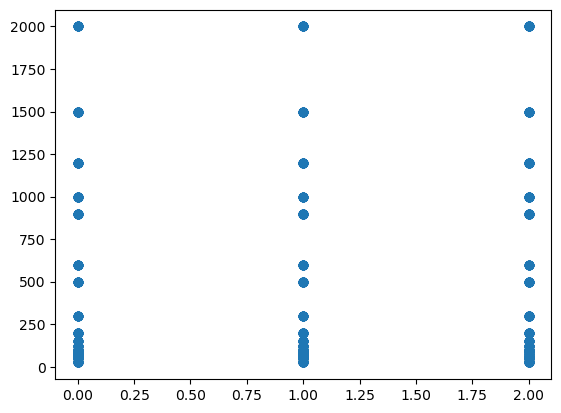

In [19]:
plt.scatter(df['Product Category'],df['Total Amount'])

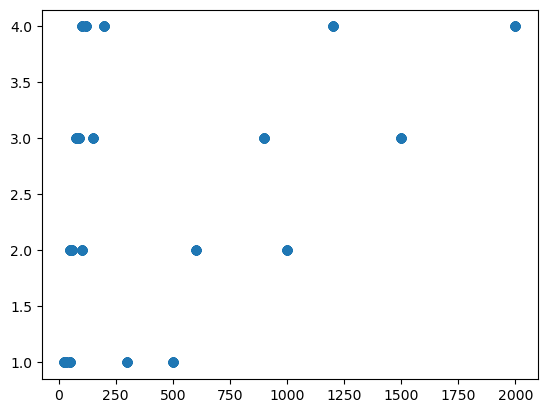

In [22]:
plt.scatter(df['Total Amount'],df['Quantity'])

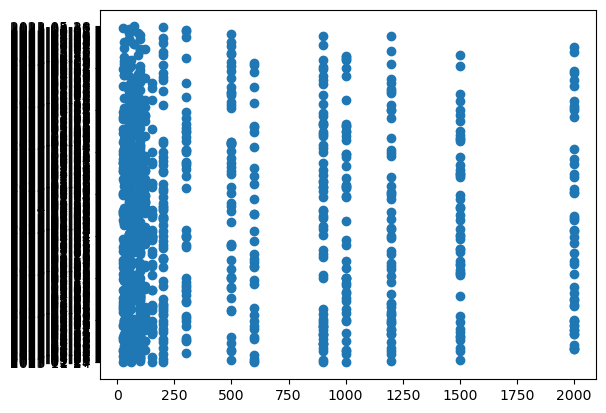

In [23]:
plt.scatter(df['Total Amount'],df['Date'])

Transaction ID         Axes(0.125,0.11;0.0945122x0.77)
Gender              Axes(0.238415,0.11;0.0945122x0.77)
Age                 Axes(0.351829,0.11;0.0945122x0.77)
Product Category    Axes(0.465244,0.11;0.0945122x0.77)
Quantity            Axes(0.578659,0.11;0.0945122x0.77)
Price per Unit      Axes(0.692073,0.11;0.0945122x0.77)
Total Amount        Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

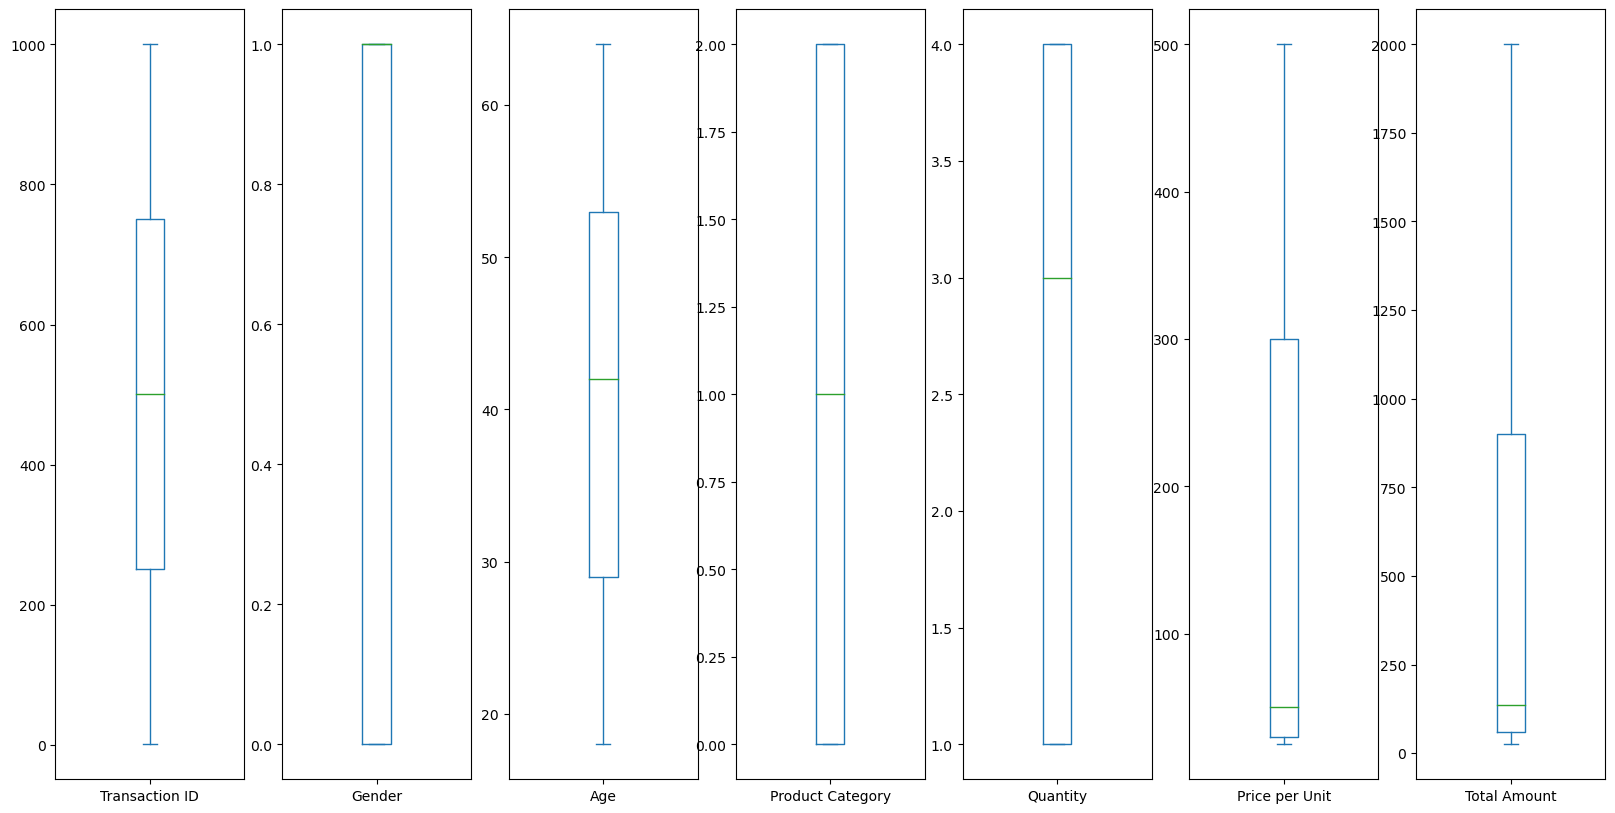

In [24]:
# Checking outliers
df.plot(kind = 'box', subplots = True, figsize = (20,10))

`Outlier Transformation`

- If outliers exists , we need to remove or fill outliers

- Removed outliers by `trimming (filtering)` or `capping (replacing)` can be solved by `z-score and IQR`

  

C:\Users\KD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


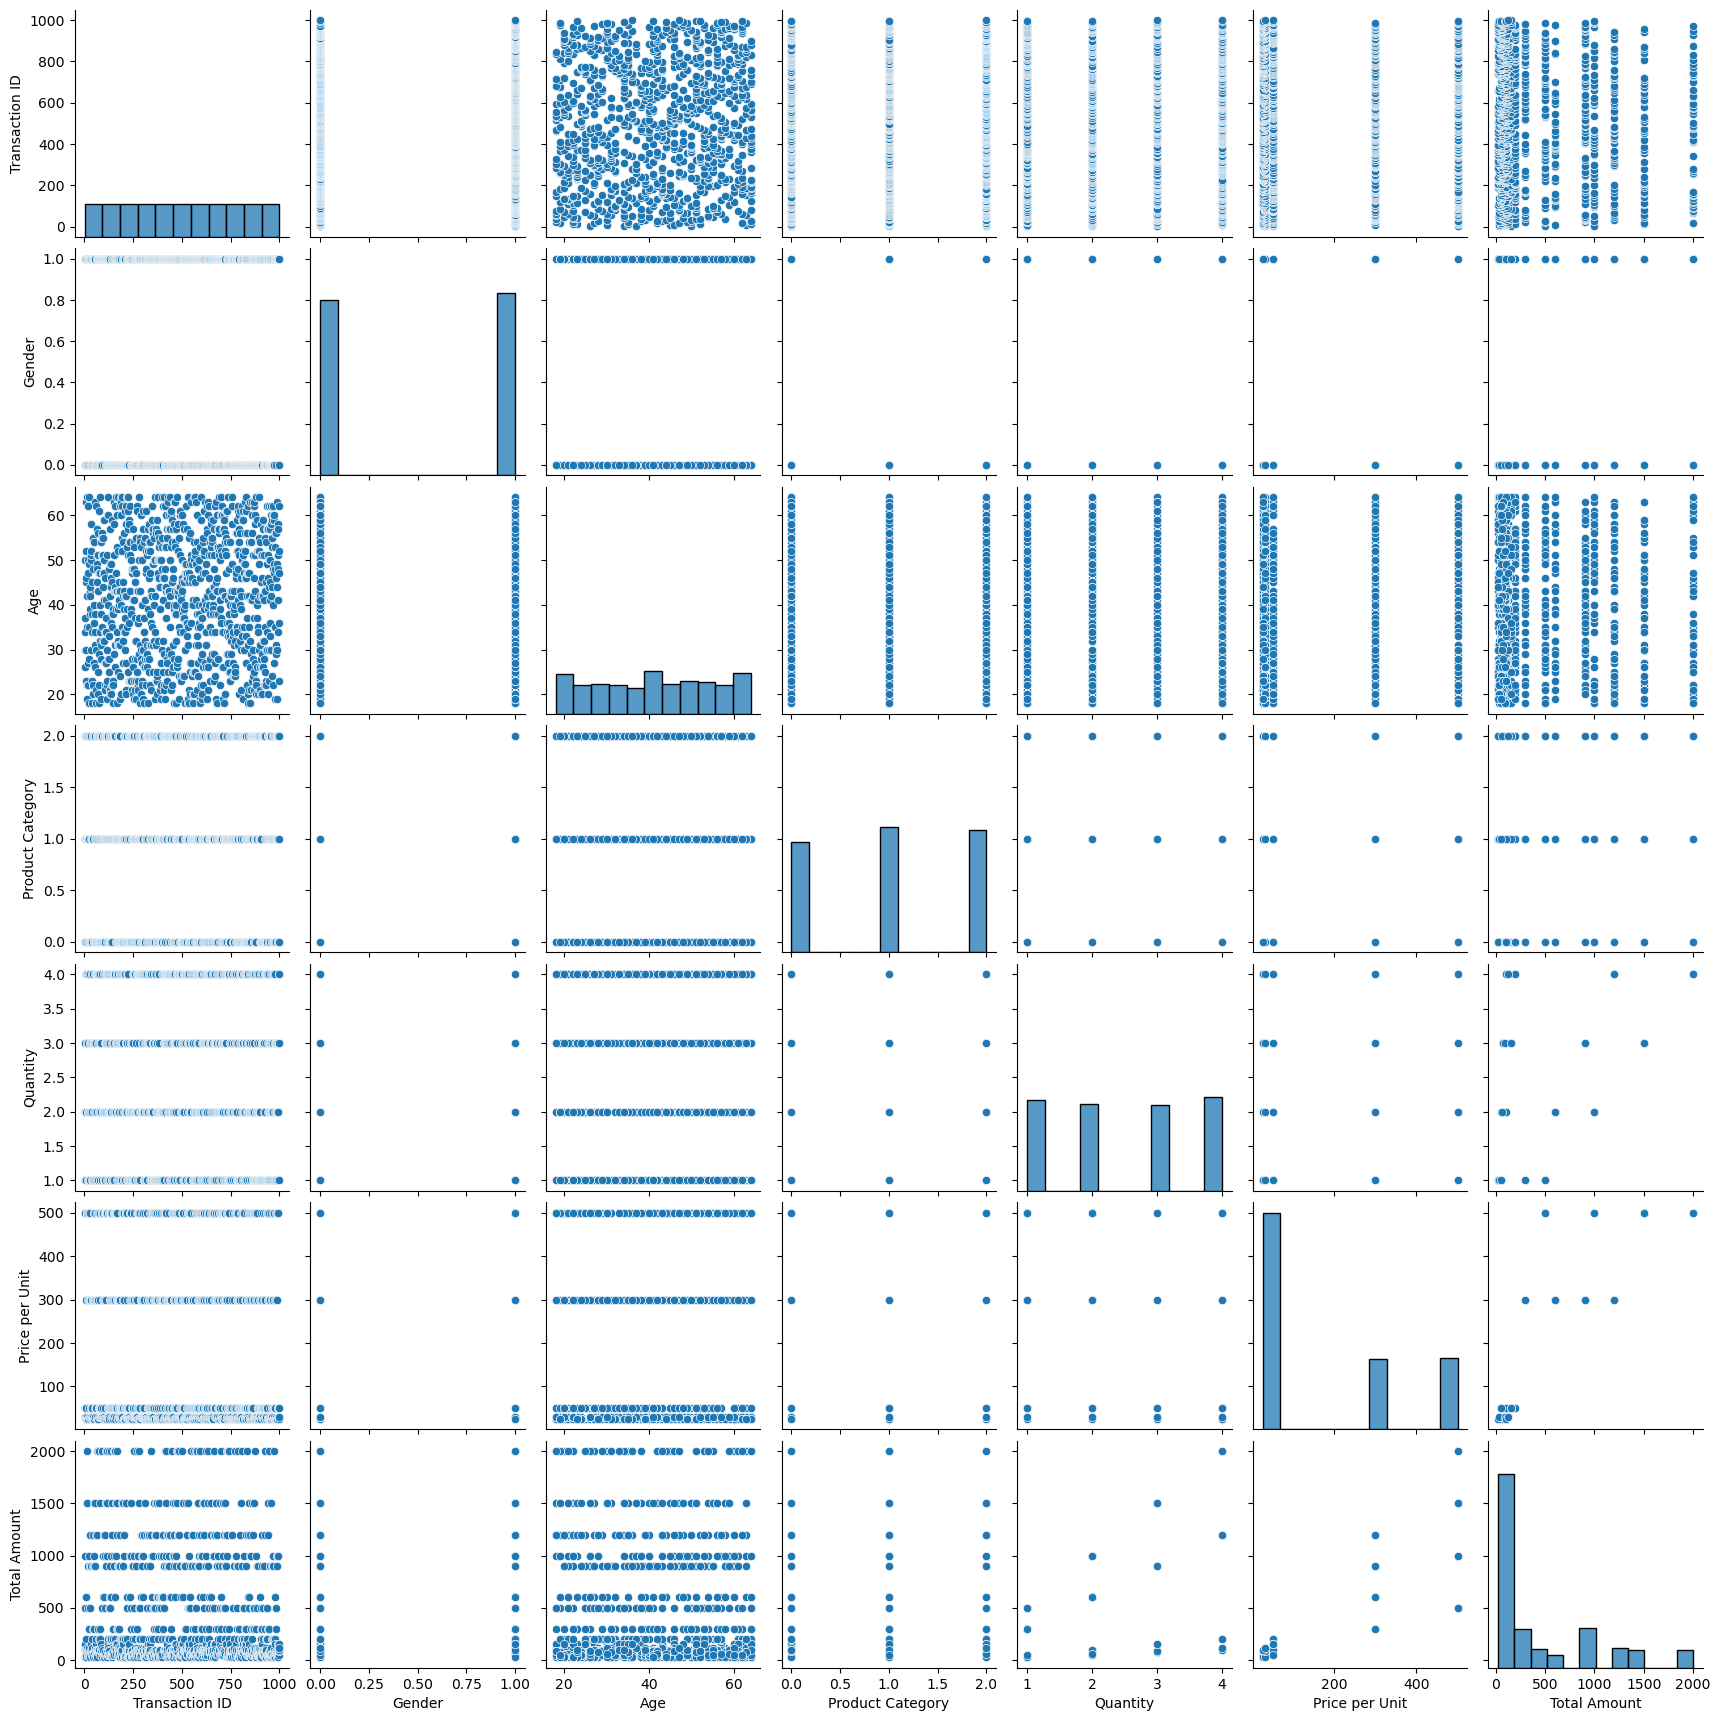

In [25]:
# Pairplot for all
sns.pairplot(df)

C:\Users\KD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


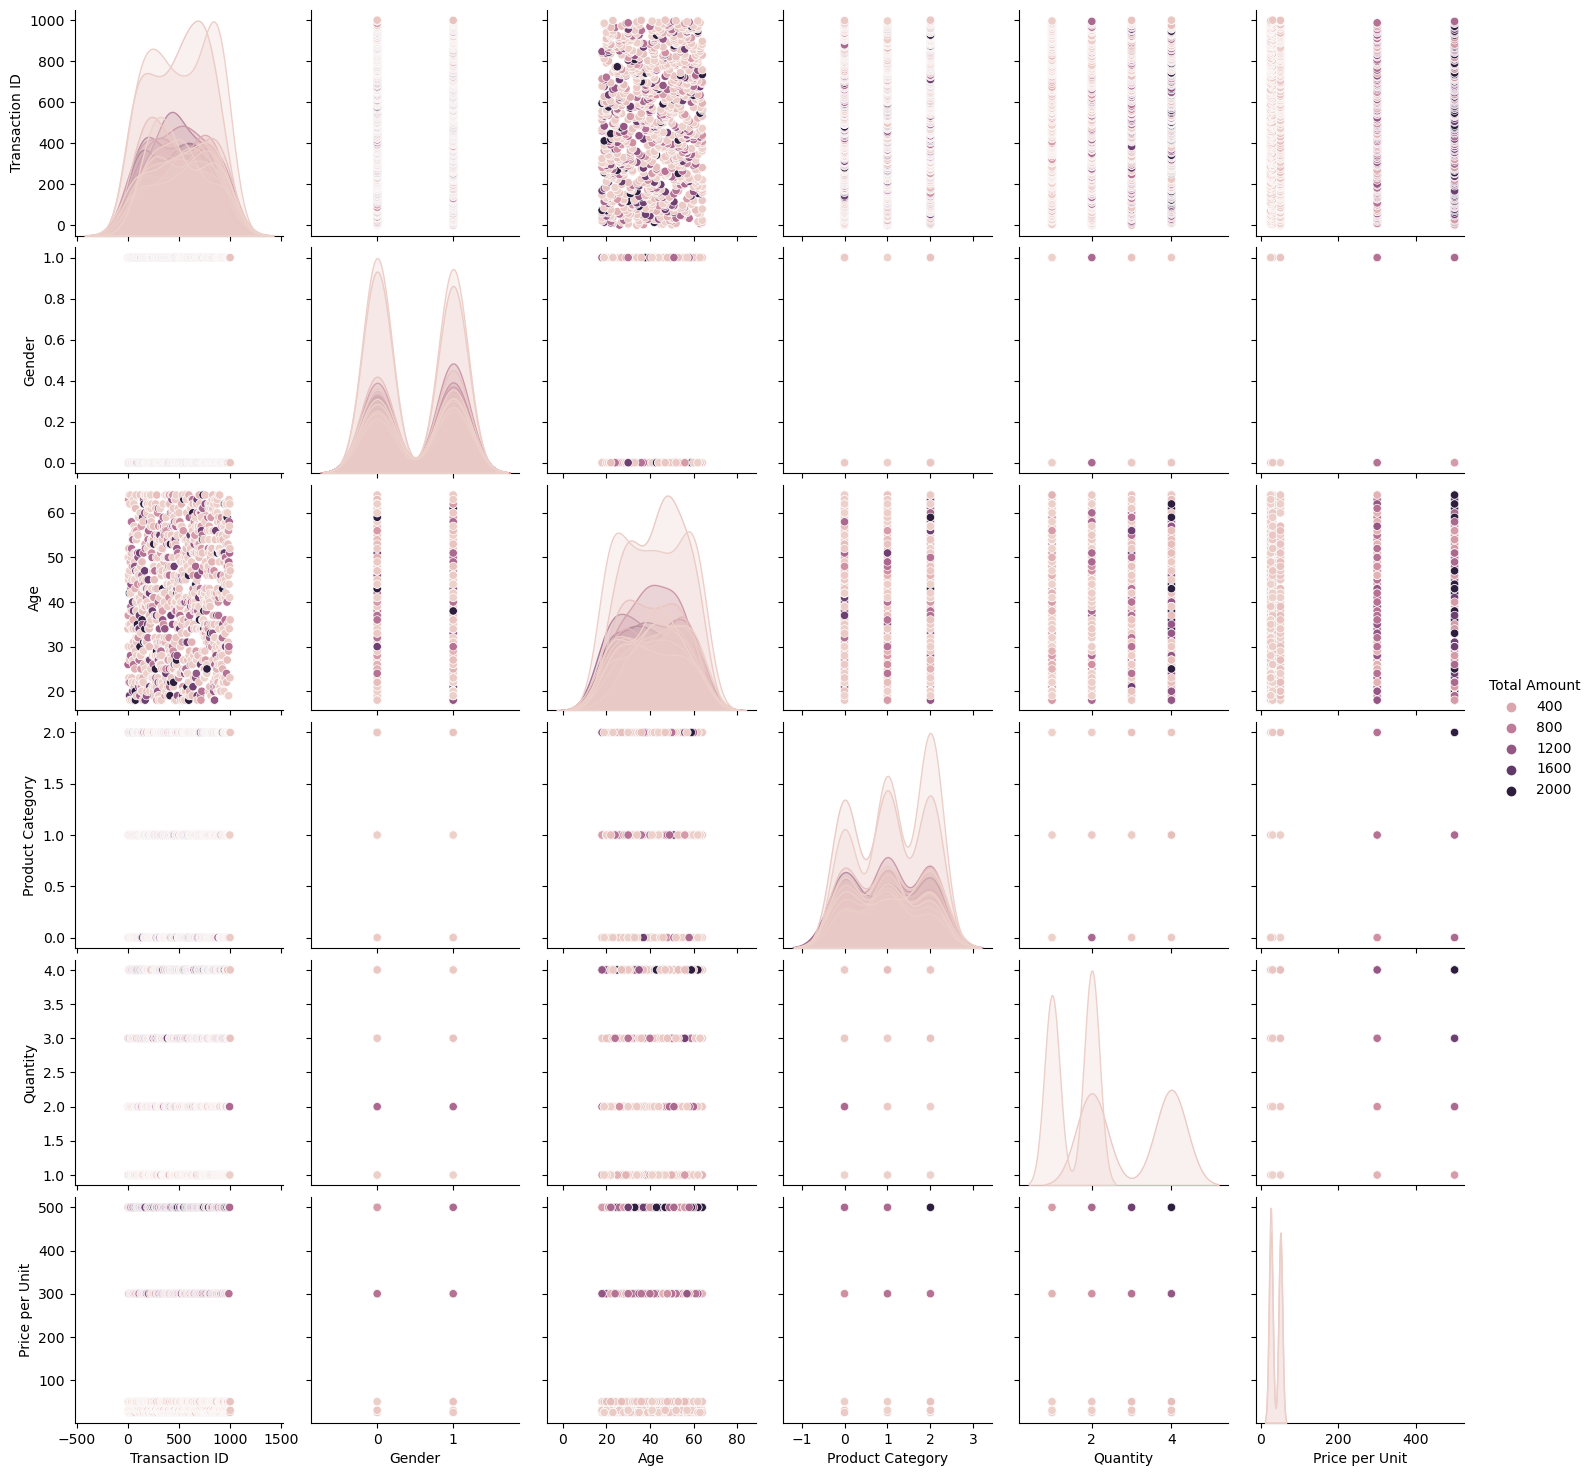

In [26]:
# pairplot for specific columns
sns.pairplot(df , hue = 'Total Amount')

C:\Users\KD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


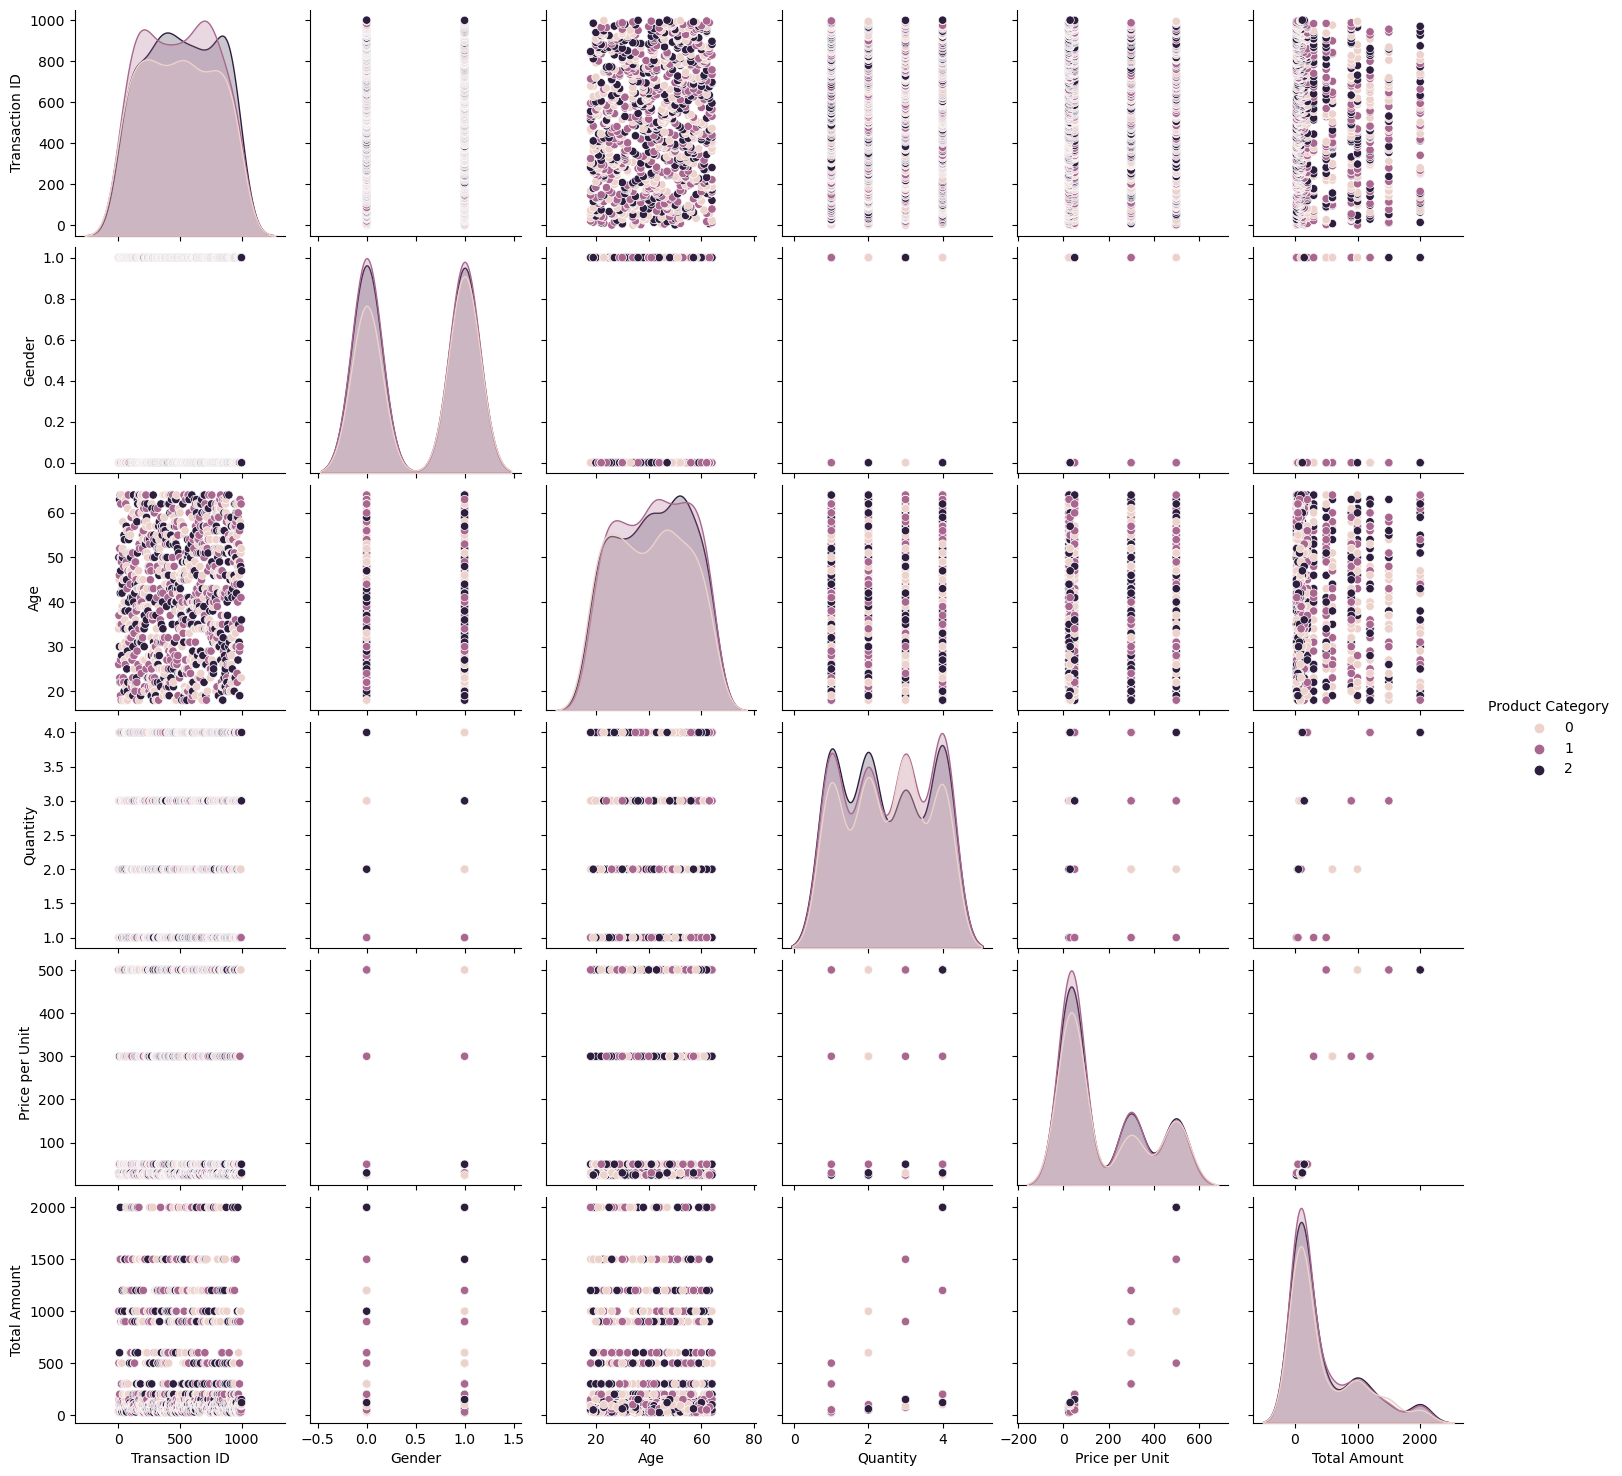

In [27]:
sns.pairplot(df , hue = 'Product Category')

C:\Users\KD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


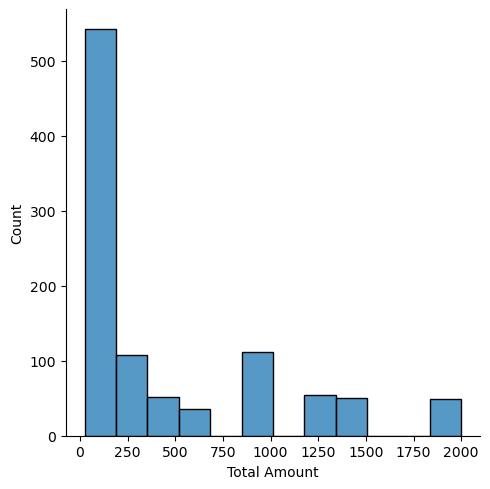

In [28]:
sns.displot(df['Total Amount'])

C:\Users\KD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


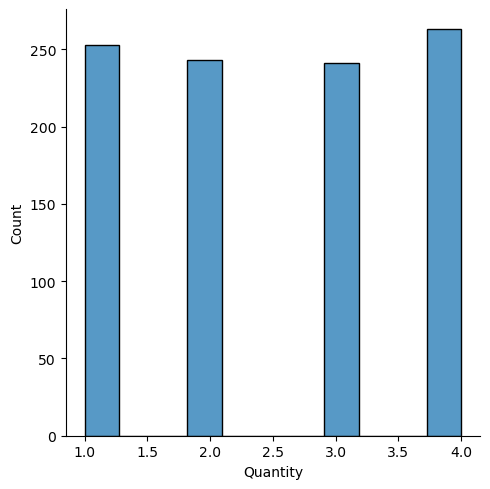

In [29]:
sns.displot(df['Quantity'])

C:\Users\KD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


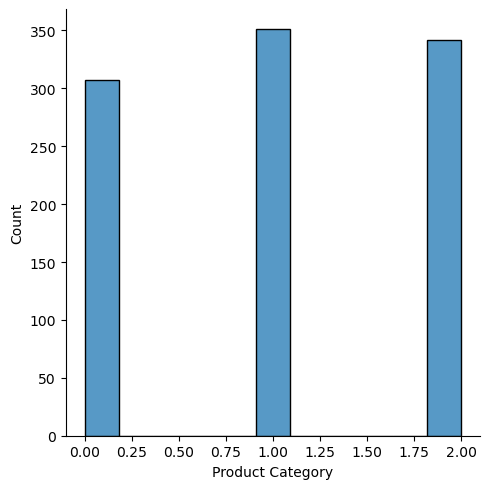

In [30]:
sns.displot(df['Product Category'])

<Axes: xlabel='Product Category', ylabel='count'>

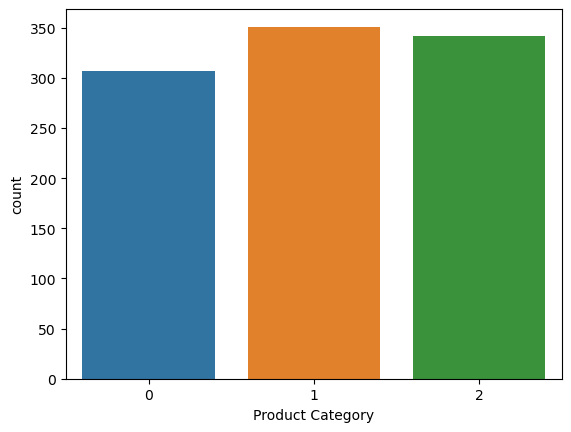

In [31]:
sns.countplot(x=df['Product Category'])

<Axes: xlabel='Total Amount', ylabel='Quantity'>

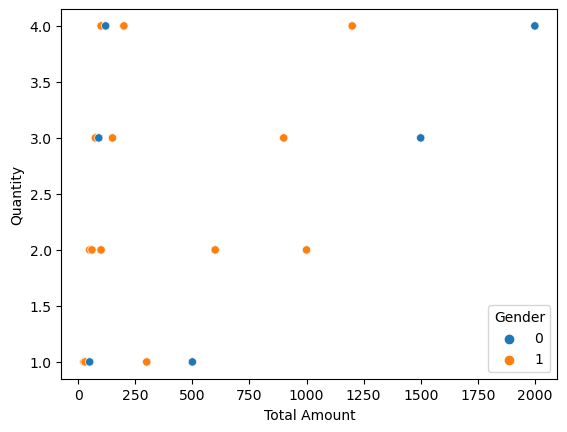

In [32]:
sns.scatterplot(x=df['Total Amount'],y=df['Quantity'], data=df,hue='Gender')

In [33]:
grouping_analysis = df.groupby("Product Category")[["Quantity","Total Amount"]].sum()
print(grouping_analysis)

                  Quantity  Total Amount
Product Category                        
0                      771        143515
1                      894        155580
2                      849        156905


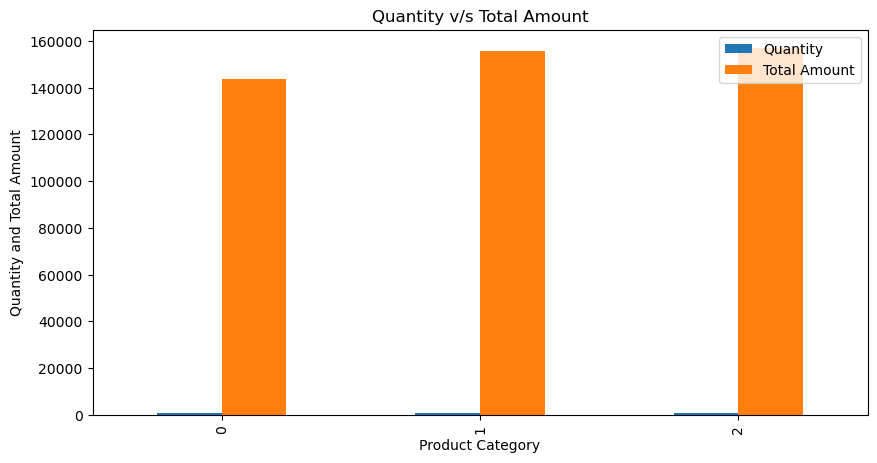

In [34]:
grouping_analysis.plot(kind='bar',figsize=(10,5))
plt.title("Quantity v/s Total Amount")
plt.ylabel("Quantity and Total Amount")
plt.show()

In [35]:
category_analysis = df['Product Category'].value_counts()
category_analysis

Product Category
1    351
2    342
0    307
Name: count, dtype: int64

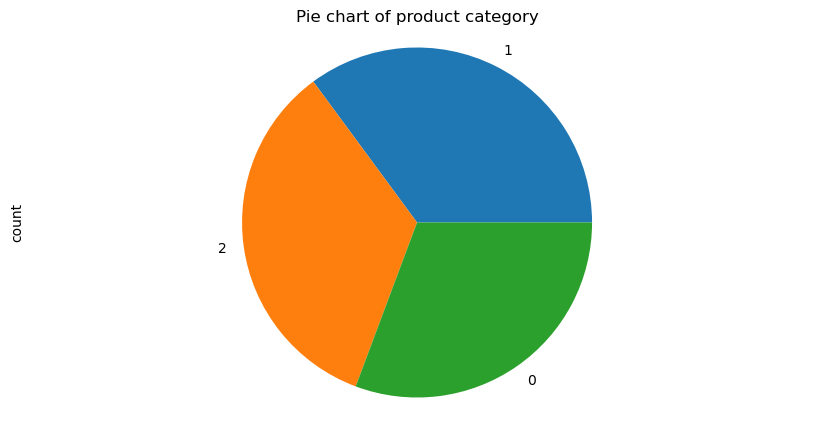

In [36]:
colour_list = ['blue','green','red']
category_analysis.plot(kind='pie',figsize=(10,5))
plt.title("Pie chart of product category")
plt.axis('equal')
plt.show()

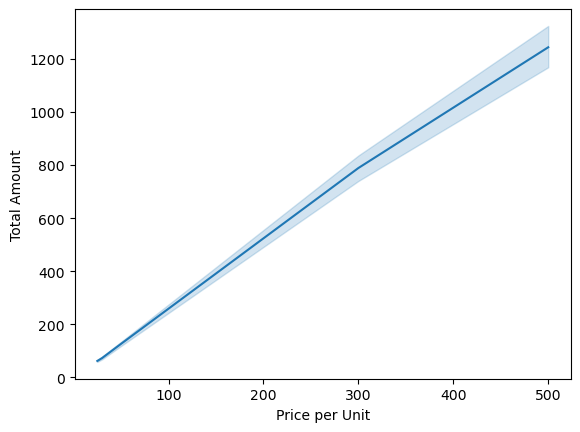

In [37]:
sns.lineplot(x='Price per Unit',y='Total Amount',data=df)
plt.show()

In [38]:
df['Price per Unit'].corr(df['Total Amount'])

0.8519248403554038

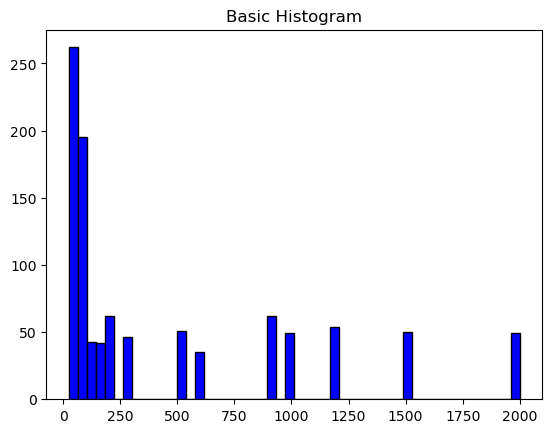

In [41]:
plt.hist(df['Total Amount'], bins=50, color='blue',edgecolor='black')
plt.title('Basic Histogram')
plt.show()